# Split Plots

In [200]:
# Libraries
import sys
sys.path.append('../')

import numpy as np
import matplotlib.pyplot as plt
import json
from simulation.trajectory_sampler import *
from envs import *
from policies import *
from data_processors import *
from tqdm import tqdm
from common import tree
import pickle


font = {'size'   : 20}
plt.rc('font', **font)  # pass in the font dict as kwargs



# LQ

In [223]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-22_07_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_2"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-12_15_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-14_14_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-14_14_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-16_52_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_3"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-20_22_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_3" # questo!!! 1x1 3
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-23_14_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_2_std_01_alpha_01/trial_3" #2x2 3
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-22_45_split_500_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_3"
]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-22_07_pg_1000_lq_10_constant_0001_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-22_30_pg_1000_lq_10_adam_001_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-22_35_pg_1000_lq_10_adam_001_gaussian_batch_100_clip_4_std_01_alpha_01/trial_0" #2x2
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))


<Figure size 640x480 with 0 Axes>

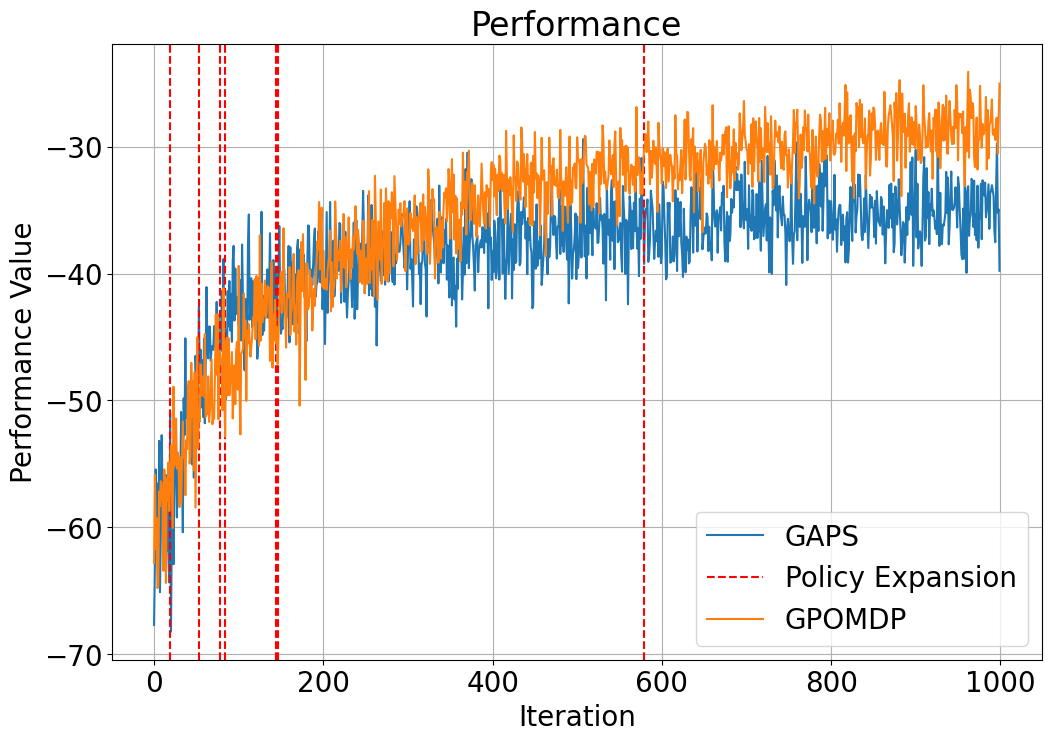

In [224]:
plt.clf()
plt.figure(figsize=(12, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GPOMDP")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.savefig("lq_2-res.pdf", format='pdf')

plt.show()

[(1.549956618205852, array([       -inf, -2.69437877])), (0.8811663088015115, array([-2.69437877, -1.98029548])), (0.7653426868314729, array([-1.98029548, -1.4078594 ])), (0.440343046749194, array([-1.4078594 , -0.47334856])), (0.09403211961659064, array([-0.47334856, -0.06580675])), (0.027510049901335133, array([-0.06580675, -0.        ])), (-0.04207652695548744, array([-0.        ,  0.13443539])), (-0.16930703475999337, array([0.13443539, 0.71327489])), (-0.6344218395474434, array([0.71327489, 1.86488592])), (-0.994024912311888, array([1.86488592, 2.93369821])), (-1.3676620385608733, array([2.93369821,        inf]))]


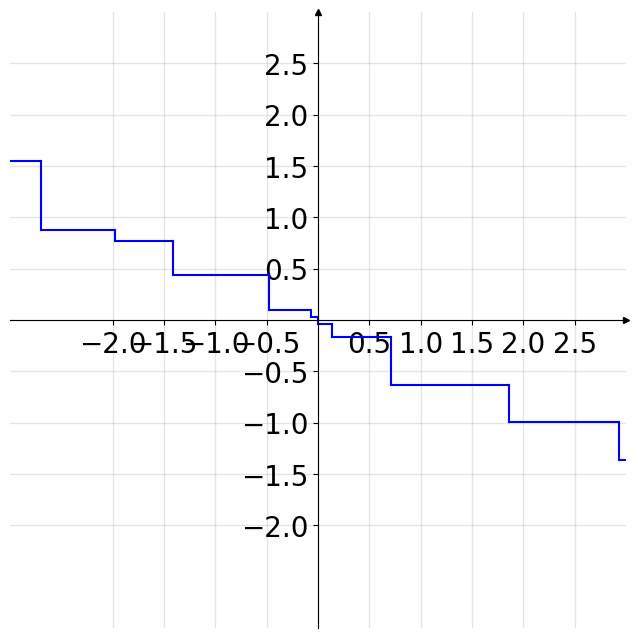

In [207]:
tree_file = "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-20_22_split_1000_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_3/policy_tree"

with open(tree_file, "rb") as f:
    tree = pickle.load(f)

leaves = tree.get_all_leaves()
policy = tree.get_current_policy()

regions = []
for node in tree.get_all_leaves():
    regions.append(tree.get_region(node, 1))

policy = np.array(policy).ravel()

ordered_policy = sorted(zip(policy, np.array(regions).squeeze()), key=lambda x: x[1][0])

print(ordered_policy)

# font = {'size'   : 7}        
# plt.rc('font', **font)

xmin = -2
xmax = 2
ymin = -2
ymax = 2
ticks_frequency = 0.5

fig, ax = plt.subplots(figsize=(12, 8))

for i, (number, interval) in enumerate(ordered_policy):
    lower_bound, upper_bound = interval
    if upper_bound == np.inf:
        upper_bound = 5
    if lower_bound == -np.inf:
        lower_bound = -5
    plt.plot([lower_bound, upper_bound], [number, number], color='blue')  # Horizontal line for the interval
    
    # Draw vertical line connecting to the next interval, if it's not the last interval
    if i < len(ordered_policy) - 1:
        next_number, next_interval = ordered_policy[i + 1]
        next_lower_bound, _ = next_interval
        plt.plot([upper_bound, upper_bound], [number, next_number], color='blue')  # Vertical line down to the next interval's lower bound

plt.grid()

ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


# Create 'x' and 'y' labels placed at the end of the axes
# ax.set_xlabel('x', size=5, labelpad=-24, x=1.03)
# ax.set_ylabel('y', size=5, labelpad=-21, y=1.02, rotation=0)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])

ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)
# ax.tick_params(labelbottom=False)    

# Draw major and minor grid lines
ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

# Draw arrows
arrow_fmt = dict(markersize=4, color='black', clip_on=False)
ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)
plt.savefig("lq_1_policy-res.pdf", format='pdf')

plt.show()

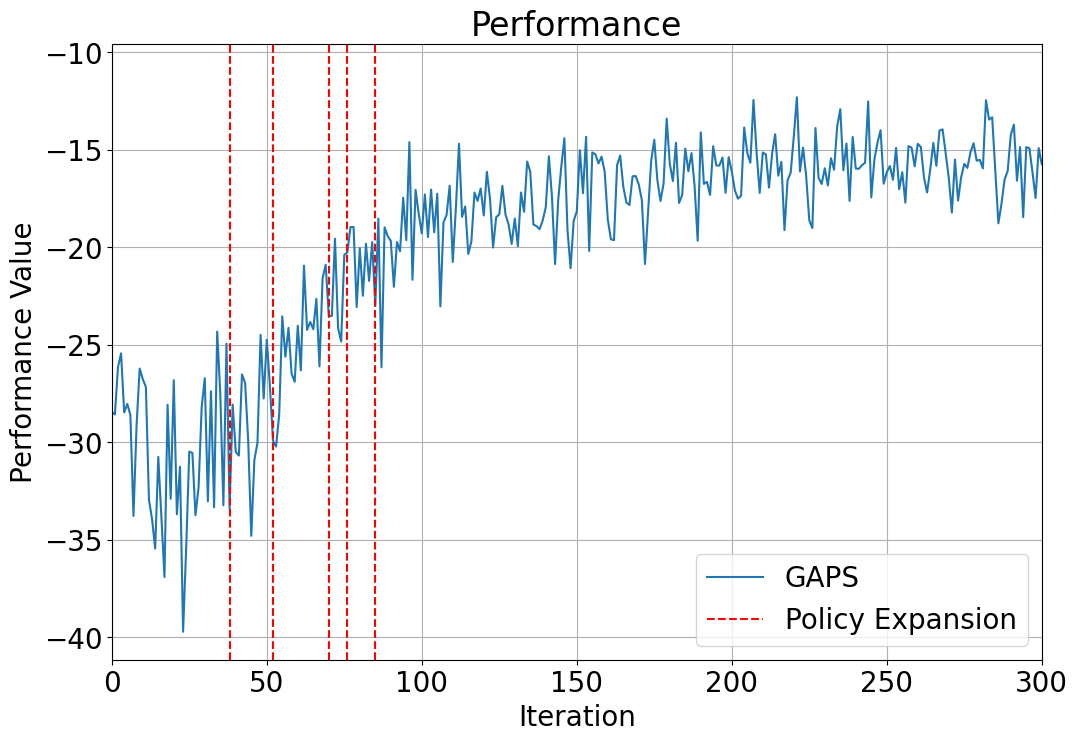

In [220]:
from scipy.interpolate import make_interp_spline

# Function to smooth data using spline interpolation
def smooth_data(x, y, points=300):
    x_smooth = np.linspace(x.min(), x.max(), points)
    spline = make_interp_spline(x, y, k=3)  # Cubic spline
    y_smooth = spline(x_smooth)
    return x_smooth, y_smooth

# Path to results_debug
path_main = ["/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-22_45_split_500_lq_10_constant_0001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_3"]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-00_12_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-00_11_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-00_10_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-00_09_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-00_07_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_22-10_24_pg_500_lq_10_adam_1e-05_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
]

data = []
for p in path_main:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

fig, ax = plt.subplots(figsize=(12, 8))

for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    y = d["performance"]
    x_smooth, y_smooth = smooth_data(x, y)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    #plt.plot(x_smooth, y_smooth, label=f"GAPS")

split = []
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)
    split = d["split_ite"]

# print(split)
# for i, d in enumerate(data_lin):
#     ite = len(d["performance"])
#     x = np.arange(ite)
#     # dim = len(d["thetas_history"][0])
#     # # Performance plot
#     # plt.plot(x, d["performance"][:-(split[i])], label=f"{i}-policy")
#     if i == 1 or i == 0 or i == 3 or i == 2:
#         # ax.plot(x, d["performance"], label=f"{i}-policy")
#         continue
#     if i == len(data_lin)-1:
#         break
#     start_index = split[i-1] if i-1 < len(split) else 0
#     # Adjust x and y to start from start_index
#     if start_index < ite:
#         x = x[start_index:]
#         y = d["performance"][start_index:]
#         x_smooth, y_smooth = smooth_data(x, y)
#         ax.plot(x, y, label=f"{i}-policy")
#         # ax.plot(x_smooth, y_smooth, label=f"{i}-policy")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.xlim(0, 300)  # Set the x-axis limit to the cutoff
plt.grid()
plt.savefig("lq_1_policy_analysis_full-res.pdf", format='pdf')


# SWIMMER

In [212]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-20_02_split_1000_swimmer_200_adam_01_split_gaussian_batch_100_clip_2_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_34_split_1000_swimmer_200_constant_0001_split_gaussian_batch_100_clip_2_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_08_split_1000_swimmer_200_constant_0001_split_gaussian_batch_100_clip_2_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_45_split_1000_swimmer_200_constant_0001_split_gaussian_batch_100_noclip_2_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_39_split_2000_swimmer_200_adam_001_split_gaussian_batch_100_clip_2_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_40_split_2000_swimmer_200_adam_01_split_gaussian_batch_100_clip_2_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-21_23_split_2000_swimmer_200_adam_01_split_gaussian_batch_100_clip_2_std_01_alpha_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_45_split_1000_swimmer_200_constant_0001_split_gaussian_batch_100_clip_2_std_01_alpha_01/trial_1" #1
]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-20_02_pg_1000_swimmer_200_adam_001_gaussian_batch_100_clip_16_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_34_pg_1000_swimmer_200_constant_00001_gaussian_batch_100_clip_16_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_12_pg_1000_swimmer_200_constant_00001_gaussian_batch_100_clip_16_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_40_pg_2000_swimmer_200_adam_001_gaussian_batch_100_clip_16_std_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-00_59_pg_1000_swimmer_200_adam_001_gaussian_batch_100_clip_16_std_01_alpha_01/trial_0" #0
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))



<Figure size 640x480 with 0 Axes>

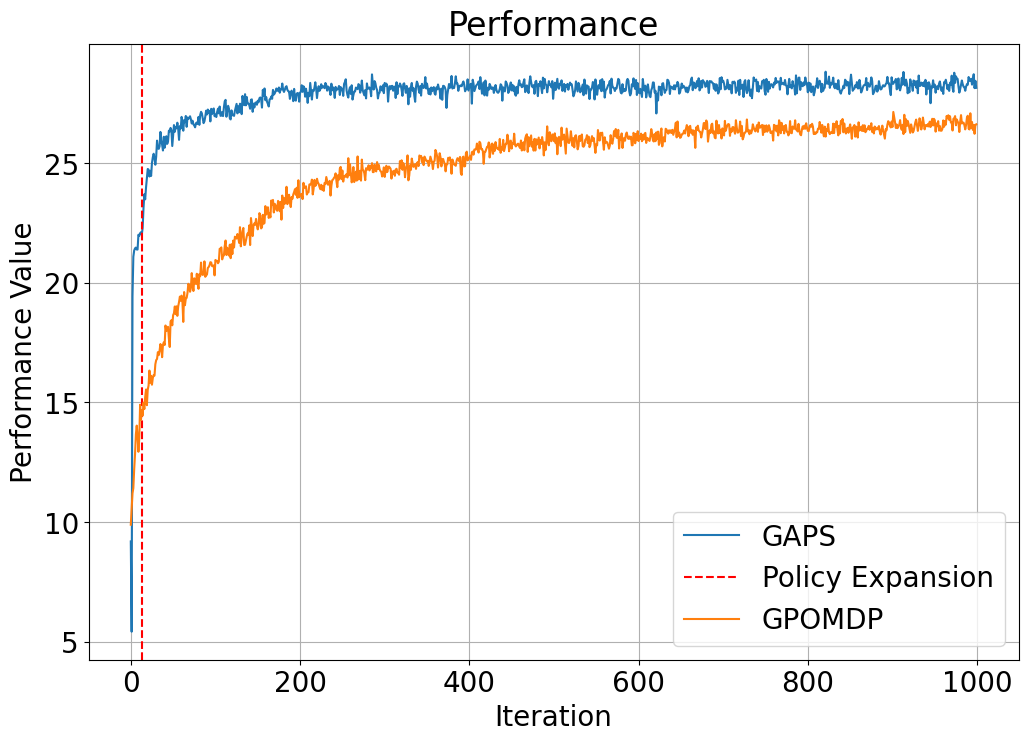

In [213]:
plt.clf()
plt.figure(figsize=(12, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GPOMDP")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()

plt.savefig("swimmer-res.pdf", format='pdf')

plt.show()



# HALF CHEETAH

In [214]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-19_57_split_1000_half_cheetah_200_adam_01_split_gaussian_batch_100_clip_6_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-23_55_split_1000_half_cheetah_200_adam_10_split_gaussian_batch_100_clip_6_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_23_split_1000_half_cheetah_200_constant_00001_split_gaussian_batch_100_clip_6_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_42_split_2000_half_cheetah_200_adam_01_split_gaussian_batch_100_clip_6_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_11_split_2000_half_cheetah_200_adam_01_split_gaussian_batch_100_clip_6_std_01_alpha_03/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-21_23_split_2000_half_cheetah_200_adam_01_split_gaussian_batch_200_clip_6_std_01_alpha_03/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-20_31_split_2000_half_cheetah_200_adam_01_split_gaussian_batch_200_clip_6_std_01_alpha_04/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-22_47_split_2000_half_cheetah_200_constant_0001_split_gaussian_batch_200_clip_6_std_01_alpha_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-16_27_split_2000_half_cheetah_200_constant_1e-05_split_gaussian_batch_200_clip_6_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-22_23_split_2000_half_cheetah_200_adam_10_split_gaussian_batch_200_clip_6_std_01_alpha_05/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-13_54_split_2000_half_cheetah_200_constant_1e-05_split_gaussian_batch_200_clip_6_std_01_alpha_05/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_51_split_1000_half_cheetah_100_adam_10_split_gaussian_batch_200_clip_6_std_01_alpha_01/trial_3" #3
]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-19_57_pg_1000_half_cheetah_200_adam_001_gaussian_batch_100_clip_102_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_23_pg_1000_half_cheetah_200_constant_1e-05_gaussian_batch_100_clip_102_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_33_pg_1000_half_cheetah_200_constant_1e-06_gaussian_batch_100_clip_102_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_12_pg_1000_half_cheetah_200_constant_5e-05_gaussian_batch_100_clip_102_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_42_pg_2000_half_cheetah_200_adam_001_gaussian_batch_100_clip_102_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-13_53_pg_2000_half_cheetah_200_constant_00001_gaussian_batch_100_clip_102_std_01_alpha_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_51_pg_1000_half_cheetah_100_adam_001_gaussian_batch_100_clip_102_std_01_alpha_01/trial_3" #3
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))


# perf = 0
# for i, d in enumerate(data_lin):
#     ite = len(d["performance"])
#     perf = d["performance"]
# mean = np.mean(perf)
# print("Mean performance: ", mean)


<Figure size 640x480 with 0 Axes>

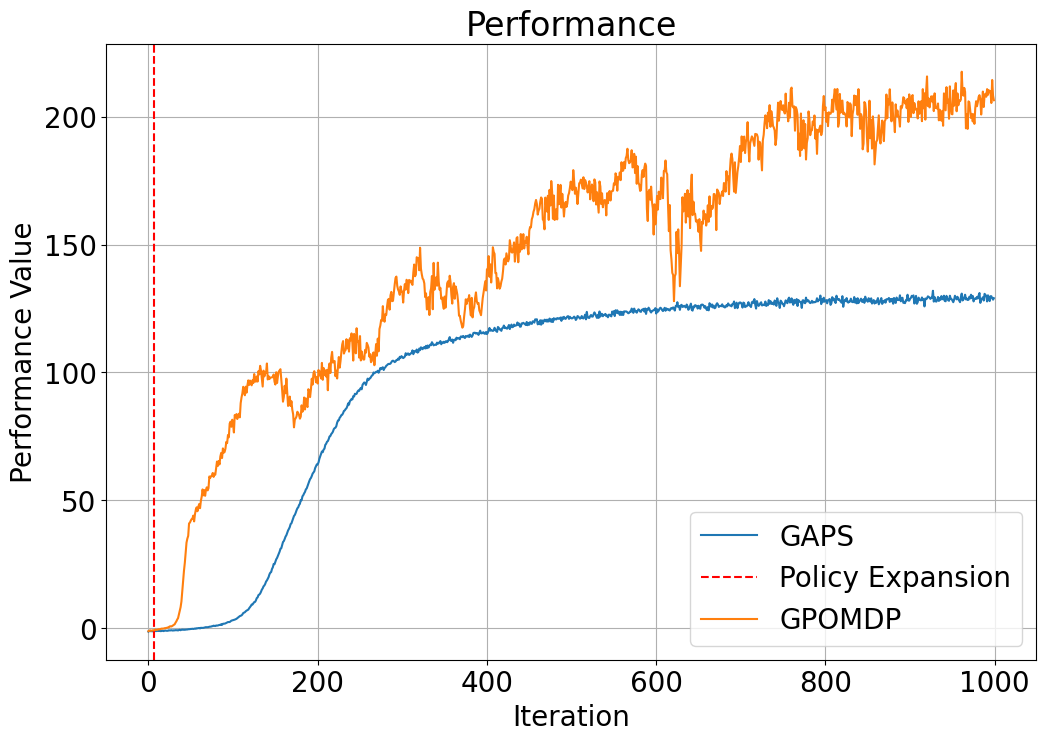

In [215]:
plt.clf()
plt.figure(figsize=(12, 8))
# # extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GPOMDP")
    

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()

plt.savefig("halfcheetah-res.pdf", format='pdf')
plt.show()



# ANT

In [216]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-20_06_split_1000_ant_200_adam_01_split_gaussian_batch_100_clip_8_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-00_20_split_1000_ant_200_adam_01_split_gaussian_batch_100_clip_8_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_25_split_1000_ant_200_constant_001_split_gaussian_batch_100_clip_8_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_04_split_1000_ant_200_constant_0001_split_gaussian_batch_100_clip_8_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_33_split_1000_ant_200_constant_00001_split_gaussian_batch_100_clip_8_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_43_split_2000_ant_200_adam_01_split_gaussian_batch_100_clip_8_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_11_split_2000_ant_200_adam_01_split_gaussian_batch_100_clip_8_std_01_alpha_03/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-21_23_split_2000_ant_200_adam_01_split_gaussian_batch_200_clip_8_std_01_alpha_03/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-20_31_split_2000_ant_200_adam_01_split_gaussian_batch_200_clip_8_std_01_alpha_04/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-00_43_split_2000_ant_200_adam_10_split_gaussian_batch_200_clip_8_std_01_alpha_05/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-13_52_split_2000_ant_200_constant_00001_split_gaussian_batch_200_clip_8_std_01_alpha_05/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_58_split_1500_ant_200_constant_00001_split_gaussian_batch_200_clip_8_std_01_alpha_01/trial_0" #0
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-10_16_split_1500_ant_200_adam_01_split_gaussian_batch_200_clip_8_std_01_alpha_01/trial_1"

]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-20_06_pg_1000_ant_200_adam_001_gaussian_batch_100_clip_216_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-12_31_pg_1000_ant_200_constant_00001_gaussian_batch_100_clip_216_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_04_pg_1000_ant_200_constant_1e-05_gaussian_batch_100_clip_216_std_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_43_pg_2000_ant_200_adam_001_gaussian_batch_100_clip_216_std_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_58_pg_1500_ant_200_adam_001_gaussian_batch_100_clip_216_std_01_alpha_01/trial_4" #4
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))



<Figure size 640x480 with 0 Axes>

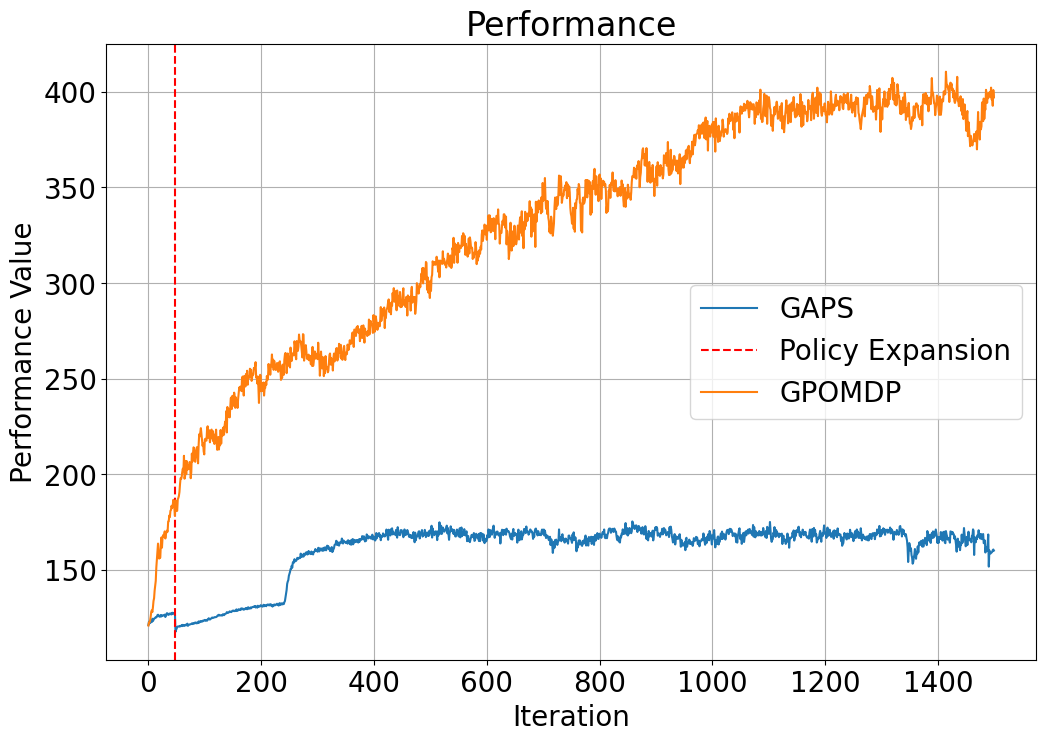

In [217]:
plt.clf()
plt.figure(figsize=(12, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot°
    plt.plot(x, d["performance"], label=f"GPOMDP")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.savefig("ant-res.pdf", format='pdf')
plt.show()



# HOPPER

In [434]:
# Path to results_debug
path = [
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-19_49_split_1000_hopper_200_adam_01_split_gaussian_batch_100_clip_3_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-22_51_split_1000_hopper_200_adam_10_split_gaussian_batch_100_clip_3_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-00_21_split_1000_hopper_200_adam_01_split_gaussian_batch_100_clip_3_std_01/trial_0", #50 samples
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_13_split_1000_hopper_200_constant_001_split_gaussian_batch_100_clip_3_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_27_split_1000_hopper_200_constant_01_split_gaussian_batch_100_clip_3_std_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_42_split_1000_hopper_200_constant_10_split_gaussian_batch_100_clip_3_std_01/trial_0"
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_16-19_49_pg_1000_hopper_200_adam_001_gaussian_batch_100_clip_33_std_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_27_pg_1000_hopper_200_constant_00001_gaussian_batch_100_clip_33_std_01/trial_0"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

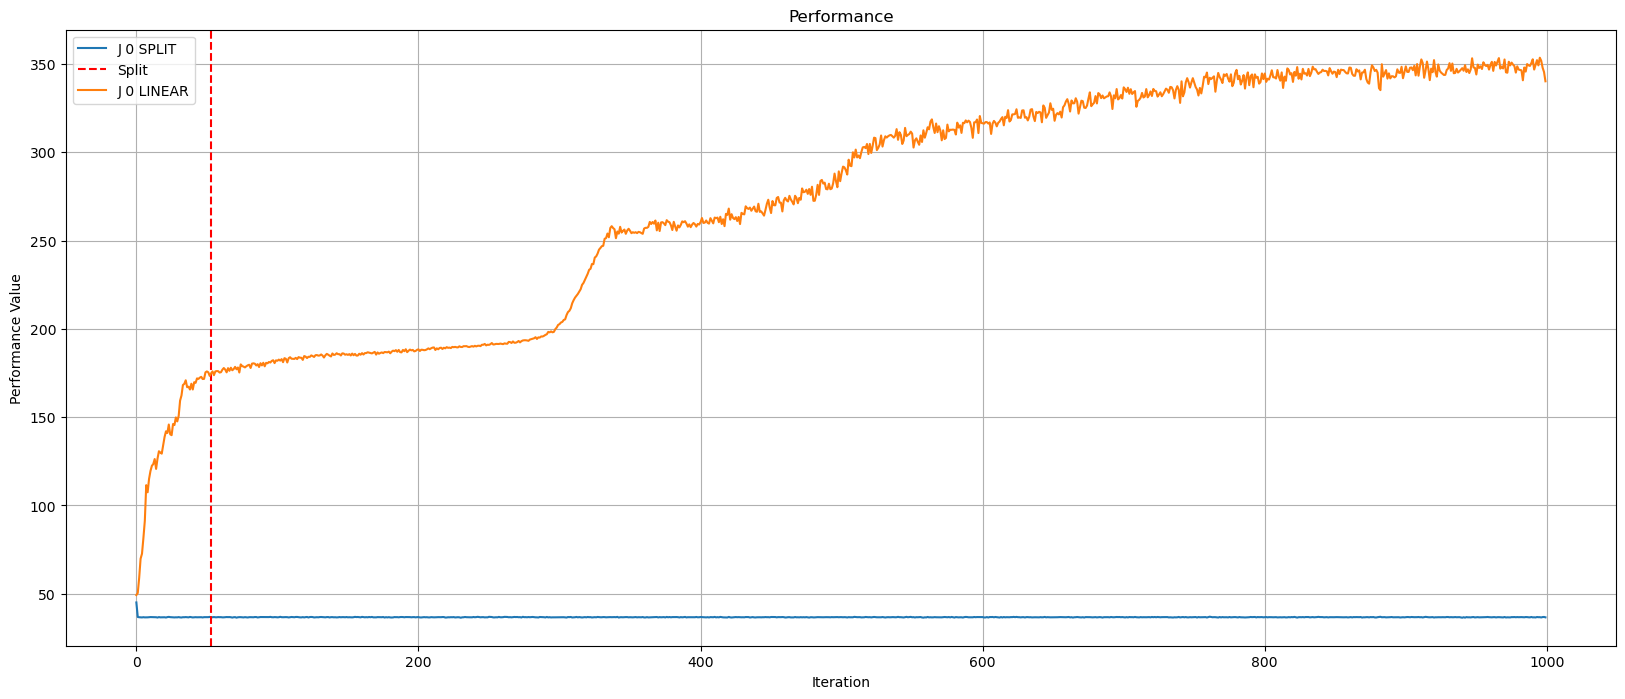

In [435]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} SPLIT")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} LINEAR")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# PENDULUM

In [565]:
# Path to results_debug
path = [
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_41_split_1000_pendulum_200_constant_1e-05_split_gaussian_batch_100_noclip_1_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_44_split_2000_pendulum_200_adam_01_split_gaussian_batch_100_noclip_1_std_01/trial_0"
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-16_57_split_2000_pendulum_200_adam_10_split_gaussian_batch_100_noclip_1_std_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-17_23_split_2000_pendulum_200_adam_00001_split_gaussian_batch_100_noclip_1_std_01/trial_0"
]

path_lin = [
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-14_05_pg_1000_pendulum_200_constant_1e-05_gaussian_batch_100_clip_3_std_01/trial_0",
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-15_44_pg_2000_pendulum_200_adam_001_gaussian_batch_100_noclip_3_std_01/trial_0"
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-16_57_pg_2000_pendulum_200_adam_01_gaussian_batch_100_noclip_3_std_01/trial_0"
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-17_23_pg_2000_pendulum_200_adam_1e-05_gaussian_batch_100_noclip_3_std_01/trial_0"
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-17_30_pg_2000_pendulum_200_adam_1e-06_gaussian_batch_100_noclip_3_std_01/trial_0"
    #"/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-17_44_pg_2000_pendulum_200_adam_0001_gaussian_batch_100_noclip_3_std_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-18_21_pg_2000_mountain_car_200_adam_1e-05_gaussian_batch_100_noclip_2_std_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-18_29_pg_2000_mountain_car_200_adam_1e-05_gaussian_batch_100_noclip_2_std_01/trial_0"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

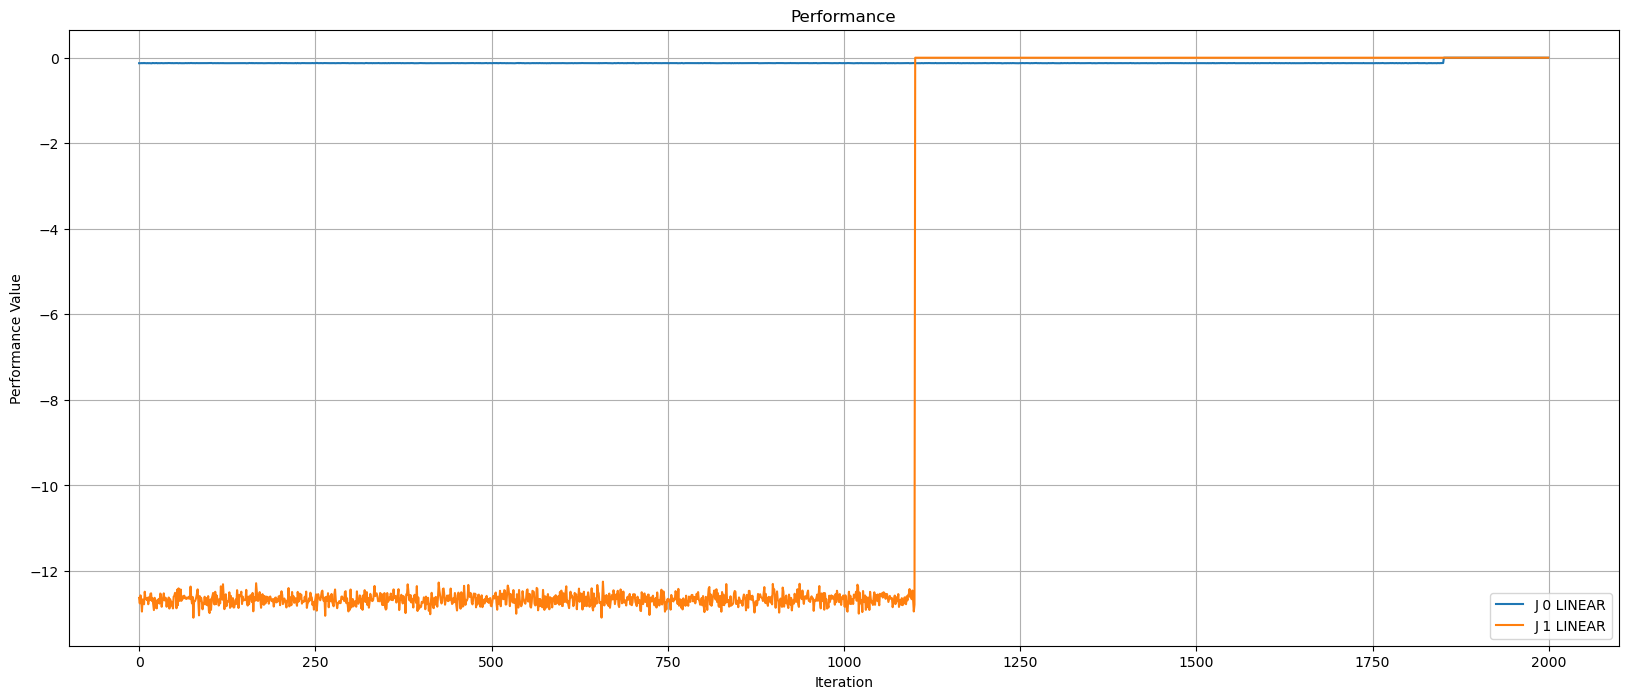

In [566]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
# for i, d in enumerate(data):
#     ite = len(d["performance"])
#     x = np.arange(ite)
#     dim = len(d["thetas_history"][0])
#     # Performance plot
#     plt.plot(x, d["performance"], label=f"J {i} SPLIT")
    
# for point in d["split_ite"]:
#     plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} LINEAR")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# PUSHER

In [1161]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_split_2000_pusher_200_adam_10_split_gaussian_batch_100_clip_7_std_01_alpha_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-20_31_split_2000_pusher_200_adam_10_split_gaussian_batch_150_clip_7_std_01_alpha_0001/trial_0" worse
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-23_13_split_2000_pusher_200_constant_00001_split_gaussian_batch_200_clip_7_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-21_49_split_2000_pusher_200_constant_1e-05_split_gaussian_batch_200_clip_7_std_01_alpha_01/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-11_47_split_2000_pusher_200_adam_10_split_gaussian_batch_200_clip_7_std_01_alpha_05/trial_0"
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_pg_2000_pusher_200_adam_01_gaussian_batch_100_clip_161_std_01_alpha_01/trial_0"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

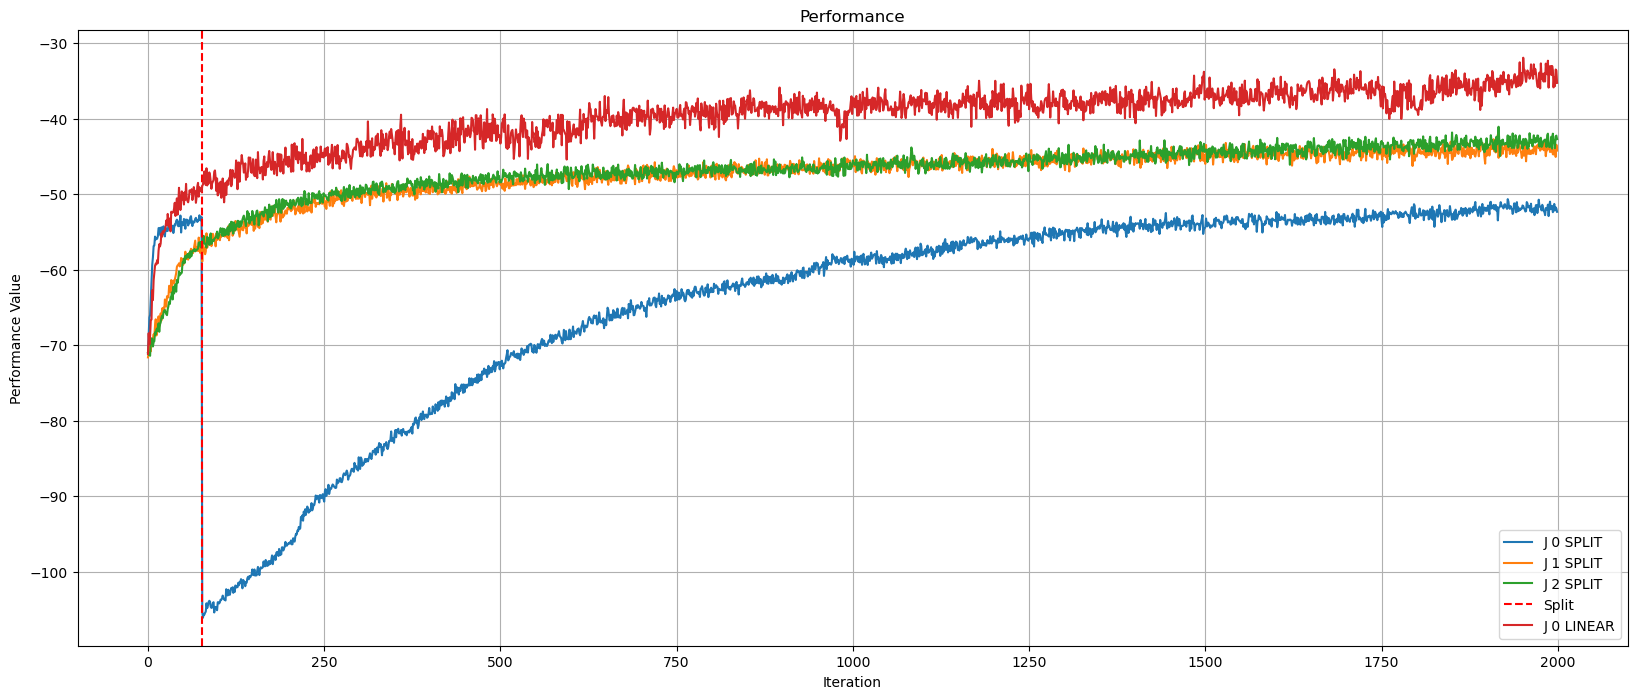

In [1162]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} SPLIT")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} LINEAR")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()

# MINIGOLF

In [218]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_split_2000_minigolf_200_adam_10_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-22_12_split_2000_minigolf_200_constant_01_split_gaussian_batch_150_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-22_47_split_2000_minigolf_200_adam_10_split_gaussian_batch_150_clip_1_std_01_alpha_01/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-22_48_split_2000_minigolf_200_constant_0001_split_gaussian_batch_200_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-15_47_split_2000_minigolf_200_constant_001_split_gaussian_batch_200_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-16_26_split_2000_minigolf_200_constant_001_split_gaussian_batch_200_clip_1_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-11_49_split_2000_minigolf_200_constant_001_split_gaussian_batch_200_clip_1_std_01_alpha_03/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_20-21_45_split_1000_minigolf_200_constant_001_split_gaussian_batch_100_clip_1_std_01_alpha_01/trial_1" #1
]

path_lin = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_pg_2000_minigolf_200_adam_01_gaussian_batch_100_clip_1_std_01_alpha_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_21-00_59_pg_1000_minigolf_200_adam_01_gaussian_batch_100_clip_1_std_01_alpha_01/trial_4" #0
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))


<Figure size 640x480 with 0 Axes>

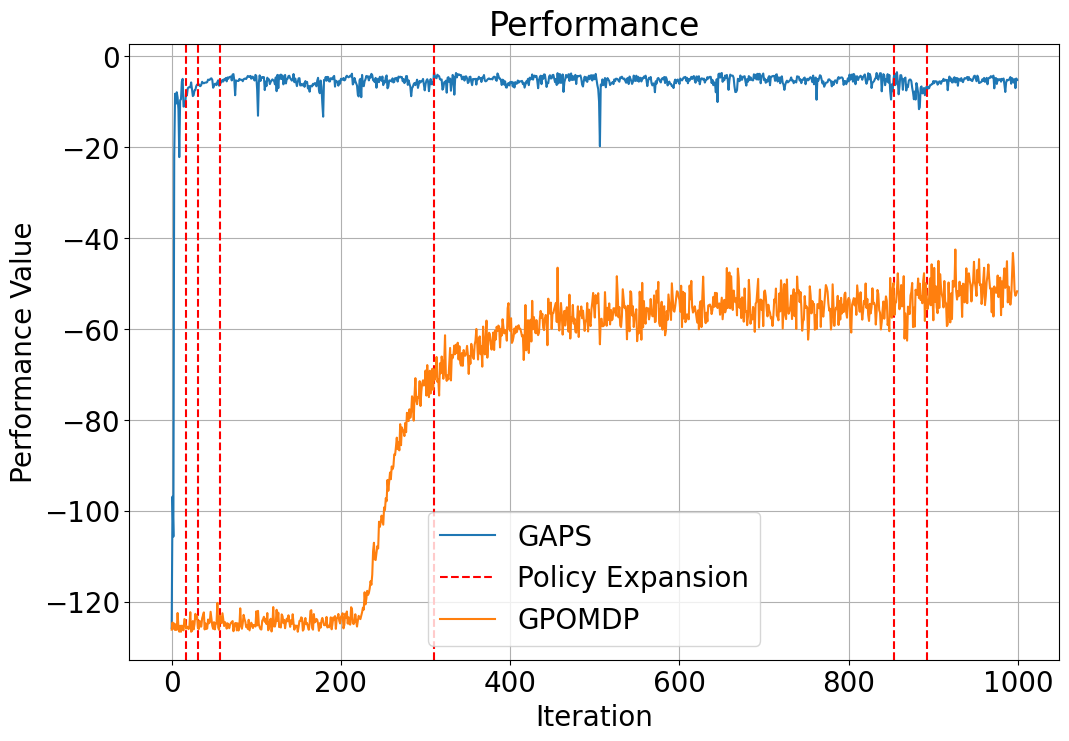

In [219]:
plt.clf()
plt.figure(figsize=(12, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GAPS")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Policy Expansion' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"GPOMDP")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.savefig("minigolf-res.pdf", format='pdf')
plt.show()



# REACHER

In [1149]:
# Path to results_debug
path = [
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_split_2000_reacher_200_adam_10_split_gaussian_batch_100_clip_2_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-22_10_split_2000_reacher_200_adam_10_split_gaussian_batch_150_clip_2_std_01_alpha_02/trial_0",
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-18_29_split_2000_reacher_200_adam_10_split_gaussian_batch_200_clip_2_std_01_alpha_02/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-23_00_split_2000_reacher_200_constant_00001_split_gaussian_batch_200_clip_2_std_01_alpha_01/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-16_47_split_2000_reacher_200_constant_00001_split_gaussian_batch_200_clip_2_std_01_alpha_03/trial_0",
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_18-22_46_split_2000_reacher_200_constant_0001_split_gaussian_batch_200_clip_2_std_01_alpha_01/trial_0"
    # "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-19_37_split_2000_reacher_200_constant_001_split_gaussian_batch_200_clip_2_std_01_alpha_03/trial_0"
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_19-21_50_split_2000_reacher_200_constant_00001_split_gaussian_batch_200_clip_2_std_01_alpha_05/trial_0"
]

path_lin = [
    "/Users/gianmarcotedeschi/Projects/learnRL/results/_05_17-20_42_pg_2000_reacher_200_adam_01_gaussian_batch_100_clip_22_std_01_alpha_01/trial_0"
]

lab = [
    "Var=0.01",
    "Var=0.1",
    "Var=1",
    "Var=10",
    "Var=100"
]

data = []
for p in path:
    name = p + "/split_results.json"
    file = open(name)
    data.append(json.load(file))

data_lin = []
for p in path_lin:
    name = p + "/pg_results.json"
    file = open(name)
    data_lin.append(json.load(file))

<Figure size 640x480 with 0 Axes>

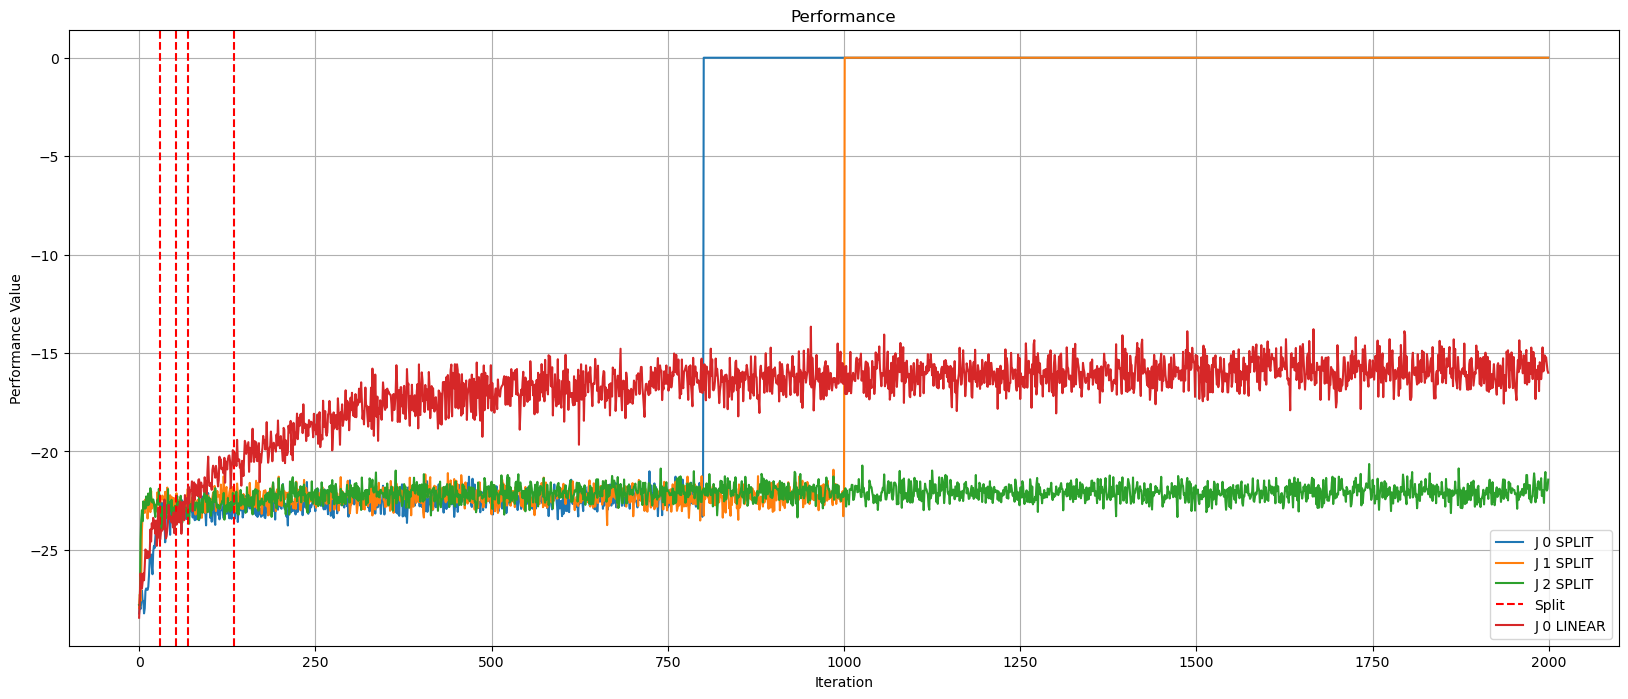

In [1150]:
plt.clf()
plt.figure(figsize=(20, 8))
# extract data
for i, d in enumerate(data):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} SPLIT")
    
for point in d["split_ite"]:
    plt.axvline(x=point, color='r', linestyle='--', label='Split' if point == d["split_ite"][0] else None)

for i, d in enumerate(data_lin):
    ite = len(d["performance"])
    x = np.arange(ite)
    dim = len(d["thetas_history"][0])
    # Performance plot
    plt.plot(x, d["performance"], label=f"J {i} LINEAR")

plt.title("Performance")
plt.xlabel("Iteration")
plt.ylabel("Performance Value")
plt.legend(loc="best")
plt.grid()
plt.show()